In [1]:
import imageio
import requests
import matplotlib.pyplot as plt
import IPython
import numpy as np
import scipy.ndimage

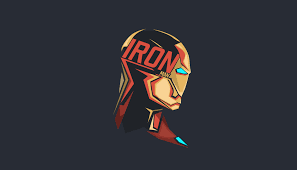

In [2]:
from PIL import Image
import requests

url="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSyJofaZoIiF9qICtUibUd8iPNx9gNgVXkYjH0nYkO3EylEJ29f&s"
img = Image.open(requests.get(url, stream=True).raw)
img

In [3]:
#from PIL import Image

#img = Image.open('Screenshot from 2020-03-09 13-40-31.png')
#img

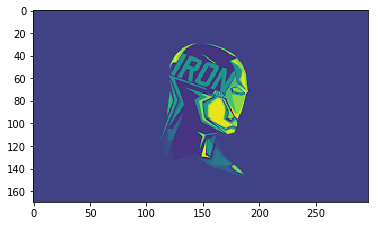

In [4]:
source_img = imageio.imread(url)

def greyscaleing(rgb):
    return np.dot(rgb[...,:3],[0.299,0.587,0.114])

grey_scale = greyscaleing(source_img)
plt.imshow(grey_scale)

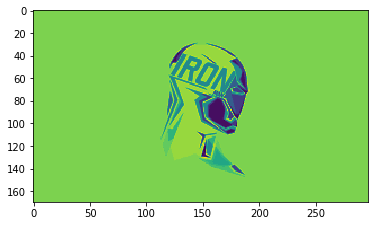

In [5]:
#invert the image by subtracting it from 255
inv_ing = (255 - grey_scale)
plt.imshow(inv_ing)

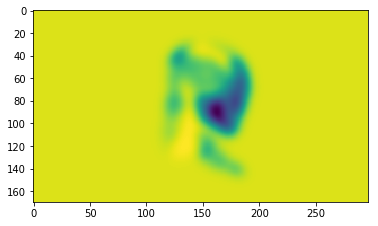

In [6]:
#blur the image using the gausian filter
blurred_img = scipy.ndimage.filters.gaussian_filter(inv_ing,sigma=5)
plt.imshow(blurred_img)

In [7]:
#create the function to perform dodging (blending greyscaled and blurred image together)
def dodging(blurred_img,grey_scale):
    dodge = blurred_img*255/(255-grey_scale)
    dodge[dodge>255]=255
    dodge[grey_scale==255]=255
    return dodge.astype("uint8")

In [8]:
#Apply and generate the img
target_img = dodging(blurred_img,grey_scale)

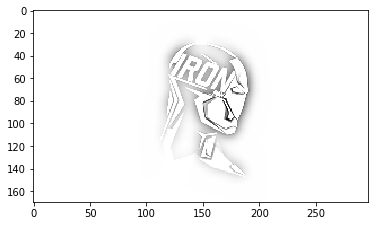

In [9]:
#Display the target img
%matplotlib inline
plt.imshow(target_img,cmap="gray")

In [10]:
#save the image
plt.imsave("ironman.png",target_img,cmap="gray",vmin=0,vmax=255)
